In [250]:
import pandas as pd
import json
import plotly
import plotly.express as px
import datetime as dt
from  geopy.geocoders import Nominatim
import meteomatics.api as weather
from api_config import *
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [324]:
geolocator = Nominatim(user_agent="HeatML")
loc = geolocator.geocode("Hong Kong"+','+ "China")
lat = loc.latitude
lng = loc.longitude

curr_dt = dt.datetime.utcnow()
prev_dt = curr_dt - dt.timedelta(days=100)
curr_dt = dt.datetime.utcnow() + dt.timedelta(days=1)
curr_dt = str(curr_dt.isoformat()) + "Z"
prev_dt = str(prev_dt.isoformat()) + "Z"
interval = 1 # hours

In [325]:
# url=f"https://api.meteomatics.com/{prev_dt}--{curr_dt}:PT{interval}H/t_apparent:F/{lat},{lng}/json?model=mix"
url=f"https://api.meteomatics.com/{prev_dt}--{curr_dt}:PT{interval}H/t_apparent:F,soil_moisture_deficit:mm,forest_fire_warning:idx,co:ugm3,o3:ugm3,no2:ugm3,t_1000m:F,t_2m:F/{lat},{lng}/json?model=mix"

In [326]:
df = weather.query_api(url=url, username=USER, password=PASSWORD)
response = dict(df.json())
response

{'version': '3.0',
 'user': 'spaceapps_gobalakrishnan',
 'dateGenerated': '2021-10-03T20:45:49Z',
 'status': 'OK',
 'data': [{'parameter': 't_apparent:F',
   'coordinates': [{'lat': 22.279328,
     'lon': 114.162813,
     'dates': [{'date': '2021-06-25T20:45:39Z', 'value': 84.8},
      {'date': '2021-06-25T21:45:39Z', 'value': 85.3},
      {'date': '2021-06-25T22:45:39Z', 'value': 86.4},
      {'date': '2021-06-25T23:45:39Z', 'value': 88.2},
      {'date': '2021-06-26T00:45:39Z', 'value': 87.6},
      {'date': '2021-06-26T01:45:39Z', 'value': 91.1},
      {'date': '2021-06-26T02:45:39Z', 'value': 96.7},
      {'date': '2021-06-26T03:45:39Z', 'value': 98.7},
      {'date': '2021-06-26T04:45:39Z', 'value': 101.0},
      {'date': '2021-06-26T05:45:39Z', 'value': 102.5},
      {'date': '2021-06-26T06:45:39Z', 'value': 98.4},
      {'date': '2021-06-26T07:45:39Z', 'value': 94.8},
      {'date': '2021-06-26T08:45:39Z', 'value': 92.7},
      {'date': '2021-06-26T09:45:39Z', 'value': 88.2},
  

In [327]:
data = response["data"]
apparent, soil, fire, co, o3, no2, t1000, t2 = data
apparent, soil, fire, co, o3, no2, t1000, t2 = apparent["coordinates"][0]["dates"], soil["coordinates"][0]["dates"], fire["coordinates"][0]["dates"], co["coordinates"][0]["dates"], o3["coordinates"][0]["dates"], no2["coordinates"][0]["dates"], t1000["coordinates"][0]["dates"], t2["coordinates"][0]["dates"]

In [328]:
df1 = pd.DataFrame(apparent).rename(columns={"value": "Heat Index (F)", "date": "Datetime"})
df2 = pd.DataFrame(soil).rename(columns={"value": "Soil Moisture (mm)", "date": "Datetime"})
df3 = pd.DataFrame(fire).rename(columns={"value": "Forest Fire Index", "date": "Datetime"})
df4 = pd.DataFrame(co).rename(columns={"value": "Carbon Monoxide (ugm3)", "date": "Datetime"})
df5 = pd.DataFrame(o3).rename(columns={"value": "Ozone (ugm3)", "date": "Datetime"})
df6 = pd.DataFrame(no2).rename(columns={"value": "Nitrogen Dioxide (ugm3)", "date": "Datetime"})
df7 = pd.DataFrame(t1000).rename(columns={"value": "Temp @ 1km (F)", "date": "Datetime"})
df8 = pd.DataFrame(t2).rename(columns={"value": "Temp @ 2m (F)", "date": "Datetime"})
df = df1
df["Soil Moisture (mm)"] = df2["Soil Moisture (mm)"]
df["Forest Fire Index"] = df3["Forest Fire Index"]
df["Carbon Monoxide (ugm3)"] = df4["Carbon Monoxide (ugm3)"]
df["Ozone (ugm3)"] = df5["Ozone (ugm3)"]
df["Nitrogen Dioxide (ugm3)"] = df6["Nitrogen Dioxide (ugm3)"]
df


,Datetime,Heat Index (F),Soil Moisture (mm),Forest Fire Index,Carbon Monoxide (ugm3),Ozone (ugm3),Nitrogen Dioxide (ugm3)
0,2021-06-25T20:45:39Z,84.8,96.4,0.1,139.486,42.582,10.612
1,2021-06-25T21:45:39Z,85.3,96.2,0.1,168.608,38.871,13.839
2,2021-06-25T22:45:39Z,86.4,96.0,0.1,207.970,34.004,18.462
3,2021-06-25T23:45:39Z,88.2,95.7,0.1,247.331,29.136,23.085
4,2021-06-26T00:45:39Z,87.6,96.3,0.1,246.051,30.075,23.662
...,...,...,...,...,...,...,...
2420,2021-10-04T16:45:39Z,85.9,218.2,0.6,195.613,86.183,18.278
2421,2021-10-04T17:45:39Z,85.5,218.2,0.6,198.031,82.850,18.507
2422,2021-10-04T18:45:39Z,85.4,218.2,0.6,195.979,76.712,17.446
2423,2021-10-04T19:45:39Z,85.4,218.2,0.6,192.566,69.721,15.994


In [257]:
fig = px.line(df, x='Datetime', y=["Ozone (ugm3)", "Nitrogen Dioxide (ugm3)"])
fig

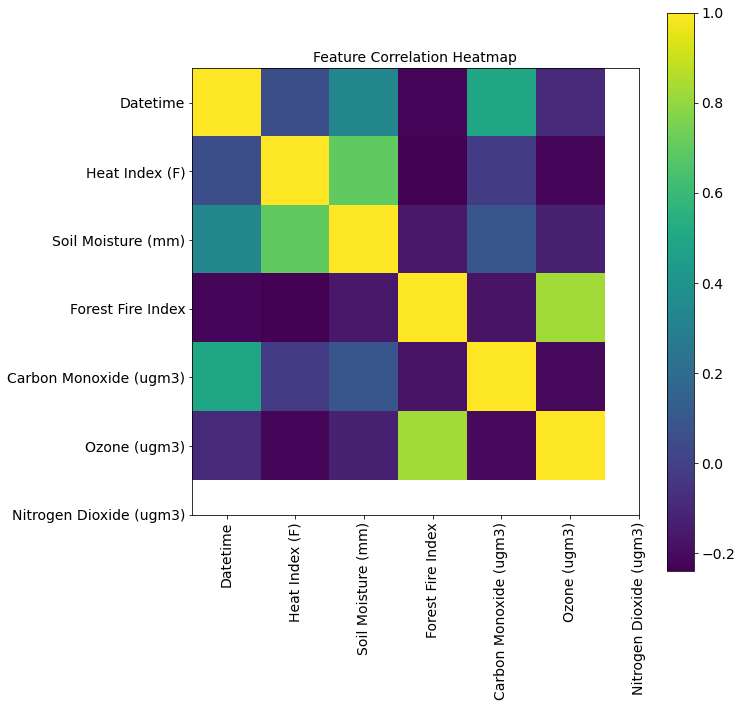

In [258]:
def show_heatmap(df):
    plt.matshow(df.corr())
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

show_heatmap(df)
# df.columns

In [225]:
from scipy import stats

# df["Datetime"] = pd.to_datetime(df["Datetime"])
# df['date_ordinal'] = pd.to_datetime(df['Datetime']).map(dt.datetime.toordinal)
# slope, intercept, r_value, p_value, std_err = stats.linregress(df['date_ordinal'], df['Heat Index (F)'])
# print(slope,
# intercept,
# r_value,p_value,
# std_err)

In [260]:
df.index = df['Datetime']
df = df[['Heat Index (F)', 'Soil Moisture (mm)', 'Forest Fire Index',
       'Carbon Monoxide (ugm3)', 'Ozone (ugm3)', 'Nitrogen Dioxide (ugm3)']]
df

,Heat Index (F),Soil Moisture (mm),Forest Fire Index,Carbon Monoxide (ugm3),Ozone (ugm3),Nitrogen Dioxide (ugm3)
Datetime,,,,,,
2021-06-25T19:39:01Z,73.8,116.4,0.8,299.507,6.390,82.773
2021-06-25T20:39:01Z,77.2,116.4,0.8,297.848,9.660,87.789
2021-06-25T21:39:01Z,81.8,116.4,0.8,269.302,18.800,79.952
2021-06-25T22:39:01Z,85.6,116.4,0.8,226.281,31.101,65.194
2021-06-25T23:39:01Z,88.9,116.4,0.8,183.259,43.402,50.437
...,...,...,...,...,...,...
2021-10-04T15:39:01Z,74.2,49.9,0.1,170.008,18.033,57.543
2021-10-04T16:39:01Z,73.9,50.0,0.1,161.558,25.636,47.267
2021-10-04T17:39:01Z,73.2,50.0,0.1,153.109,33.238,36.991


<AxesSubplot:xlabel='Datetime'>

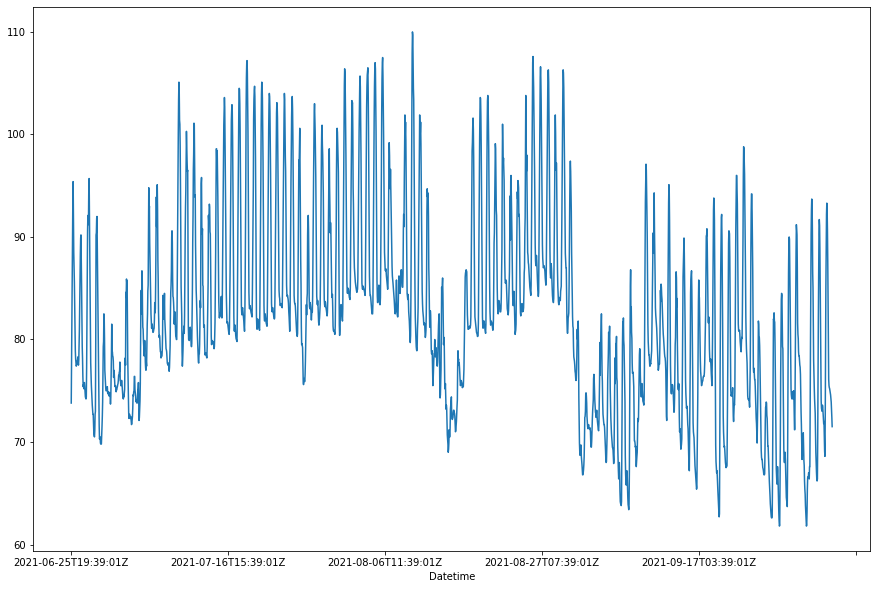

In [261]:
# fig = px.line(df, x='Datetime', y=["Heat Index (F)"])
# fig
df_hi = df["Heat Index (F)"]
df_hi.plot(figsize=(15,10))

<AxesSubplot:xlabel='Datetime'>

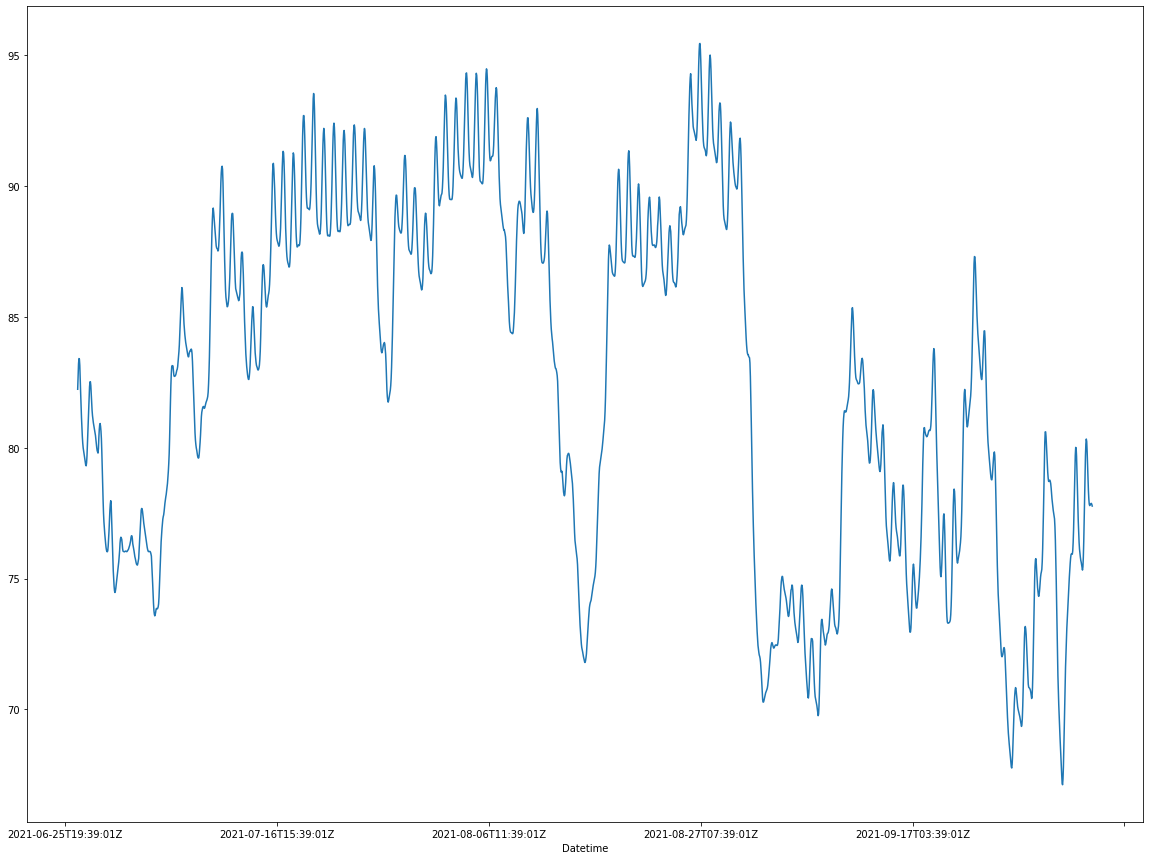

In [262]:
hi_df_mean = df["Heat Index (F)"].rolling(window=30).mean()
hi_df_mean.plot(figsize=(20,15))

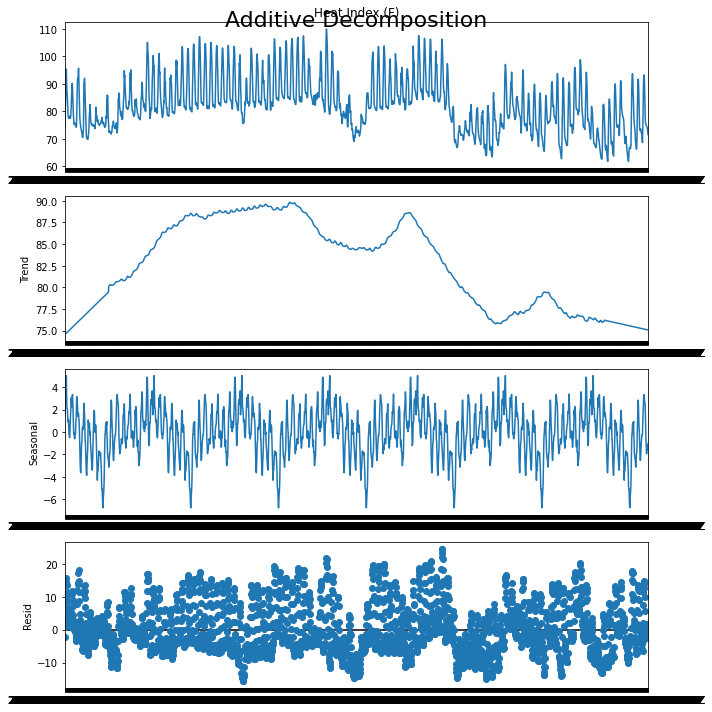

In [263]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
result_add = seasonal_decompose(df_hi, model="additive", extrapolate_trend='freq', period=365)

plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

In [288]:
hi_trend = pd.DataFrame(result_add.trend)["trend"]
hi_trend

Datetime
2021-06-25T19:39:01Z    74.550184
2021-06-25T20:39:01Z    74.577280
2021-06-25T21:39:01Z    74.604377
2021-06-25T22:39:01Z    74.631474
2021-06-25T23:39:01Z    74.658571
                          ...    
2021-10-04T15:39:01Z    75.108098
2021-10-04T16:39:01Z    75.101864
2021-10-04T17:39:01Z    75.095631
2021-10-04T18:39:01Z    75.089397
2021-10-04T19:39:01Z    75.083164
Name: trend, Length: 2425, dtype: float64

In [269]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [270]:
import warnings
warnings.filterwarnings("ignore")
max_AIC = 1e20
par = None
seas_par = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                df["Heat Index (F)"],
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results=mod.fit()
            if results.aic < max_AIC:
                max_AIC = results.aic
                par = param
                seas_par = param_seasonal
        except:
            continue
print(max_AIC, par, seas_par)

8327.627158196989 (1, 1, 1) (1, 1, 1, 12)


In [271]:
mod = sm.tsa.statespace.SARIMAX(
    df_hi,
    order=par,
    seasonal_order=seas_par,
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = mod.fit()

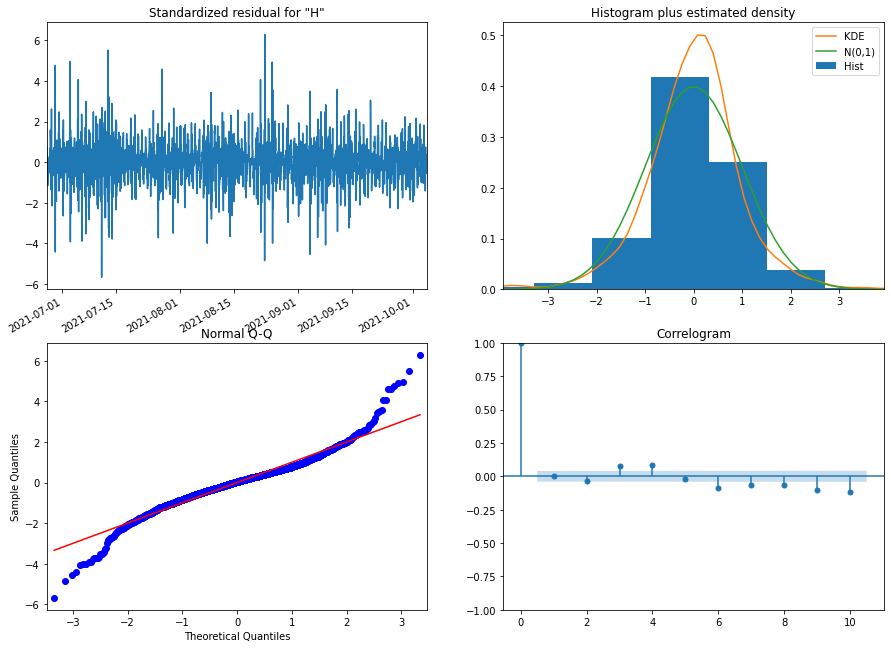

In [272]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [276]:
pred = results.forecast(steps=200, dynamic=False, full_results=True)
df_pred = pd.DataFrame(pred)
df_pred

,predicted_mean
2021-10-04 20:39:01+00:00,70.512760
2021-10-04 21:39:01+00:00,72.070707
2021-10-04 22:39:01+00:00,74.594956
2021-10-04 23:39:01+00:00,77.169721
2021-10-05 00:39:01+00:00,79.482728
...,...
2021-10-12 23:39:01+00:00,76.902178
2021-10-13 00:39:01+00:00,78.733878
2021-10-13 01:39:01+00:00,79.755734
2021-10-13 02:39:01+00:00,79.851257


In [283]:
mn = df_pred["predicted_mean"].mean()
df_pred["Heat Index (F)"] = df_pred["predicted_mean"] + ((df_pred["predicted_mean"] - mn) * 2)


In [284]:
import plotly.graph_objects as go
# set up plotly figure
df_hi = pd.DataFrame(df_hi)
fig = go.Figure()

# add line / trace 1 to figure
fig.add_trace(go.Line(
    x=df_hi.index,
    y=df_hi['Heat Index (F)'],
    # hovertext=df['A_info'],
    # hoverinfo="text",
    marker=dict(
        color="blue"
    ),
    showlegend=False
))

# add line / trace 2 to figure
fig.add_trace(go.Line(
    x=df_pred.index,
    y=df_pred['Heat Index (F)'],
    # hovertext=df['B_info'],
    # hoverinfo="text",
    marker=dict(
        color="red"
    ),
    showlegend=False
))

fig.show()

In [285]:
df_all_hi = df_hi.append(df_pred) 
# fig = px.line(df, x='Datetime', y="Forest Fire Index", title="Forest Fire Index Time Series")
df_all_hi = pd.DataFrame(df_all_hi["Heat Index (F)"])
df_all_hi

,Heat Index (F)
2021-06-25T19:39:01Z,73.800000
2021-06-25T20:39:01Z,77.200000
2021-06-25T21:39:01Z,81.800000
2021-06-25T22:39:01Z,85.600000
2021-06-25T23:39:01Z,88.900000
...,...
2021-10-12 23:39:01+00:00,77.788376
2021-10-13 00:39:01+00:00,83.283475
2021-10-13 01:39:01+00:00,86.349045
2021-10-13 02:39:01+00:00,86.635612


In [293]:
df

,Heat Index (F),Soil Moisture (mm),Forest Fire Index,Carbon Monoxide (ugm3),Ozone (ugm3),Nitrogen Dioxide (ugm3)
Datetime,,,,,,
2021-06-25T19:39:01Z,73.8,116.4,0.8,299.507,6.390,82.773
2021-06-25T20:39:01Z,77.2,116.4,0.8,297.848,9.660,87.789
2021-06-25T21:39:01Z,81.8,116.4,0.8,269.302,18.800,79.952
2021-06-25T22:39:01Z,85.6,116.4,0.8,226.281,31.101,65.194
2021-06-25T23:39:01Z,88.9,116.4,0.8,183.259,43.402,50.437
...,...,...,...,...,...,...
2021-10-04T15:39:01Z,74.2,49.9,0.1,170.008,18.033,57.543
2021-10-04T16:39:01Z,73.9,50.0,0.1,161.558,25.636,47.267
2021-10-04T17:39:01Z,73.2,50.0,0.1,153.109,33.238,36.991


In [311]:
from scipy import stats

df_tmp = df
df_tmp["date"] = pd.to_datetime(df_tmp["Datetime"])
df_tmp['date_ordinal'] = pd.to_datetime(df_tmp['Datetime']).map(dt.datetime.toordinal)
slope_hi = stats.linregress(df['date_ordinal'], df["Forest Fire Index"]).slope
last_hi = df["Forest Fire Index"].iat[-1]
last_hi + slope_hi * 100

-0.036127376839896225

In [329]:
fig = px.line(df, x='Datetime', y=["Ozone (ugm3)", "Nitrogen Dioxide (ugm3)", "Carbon Monoxide (ugm3)"])
fig